In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib as plt
from scipy.signal import convolve2d
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

C:\Users\a2224\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib inline

## 讀取資料(訓練集、測試集)

In [3]:
Mnist_train_data = pd.read_csv("train.csv")
Mnist_test_data = pd.read_csv("test.csv")

In [4]:
x_pd_train = Mnist_train_data.drop("label", axis = 1)
y_pd_train = Mnist_train_data[["label"]]
x_pd_test = Mnist_test_data

## 改變維度

In [5]:
x_array_train = x_pd_train.values.reshape(x_pd_train.values.shape[0],28,28)
y_array_train = y_pd_train["label"].values
x_array_test = x_pd_test.values.reshape(x_pd_test.values.shape[0],28,28)

In [6]:
x_array_train.shape

(42000, 28, 28)

In [7]:
y_array_train.shape

(42000,)

In [8]:
x_array_test.shape

(28000, 28, 28)

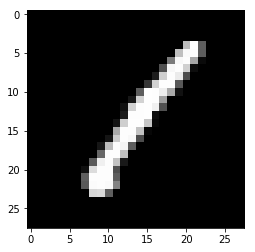

In [9]:
plt.pyplot.imshow(x_array_train[0], cmap = "gray")

In [10]:
y_array_train[0]

1

## 數字的顏色都是單色，因此轉成28x28x1

In [11]:
x_array_train_4d = x_pd_train.values.reshape(x_pd_train.values.shape[0],28,28,1).astype("float32")
x_array_test_4d = x_pd_test.values.reshape(x_pd_test.values.shape[0],28,28,1).astype("float32")

In [12]:
x_array_train_4d.shape

(42000, 28, 28, 1)

In [13]:
x_array_test_4d.shape

(28000, 28, 28, 1)

## 資料前處理

In [14]:
# 將數值縮小到0~1
x_array_train_4d_reduce = x_array_train_4d / 255
x_array_test_4d_reduce = x_array_test_4d / 255

In [15]:
# 轉換類別資料(onehot encoding)
y_array_train_onehot = pd.get_dummies(y_pd_train["label"]).values

## 建立CNN模型

In [16]:
model = Sequential()

In [17]:
# padding='same', 'valid'
# valid代表只進行有效的卷積，對邊界數據不處理
# same代表保留邊界處的卷積結果，通常會導致輸出shape與輸入shape相同
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding="same",
                 input_shape=(28,28,1),
                 activation="relu"))

In [18]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding="same",
                 activation="relu"))

In [20]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
# 拿掉一定比例的神經元來避免Overfitting
model.add(Dropout(0.25))

In [22]:
# 平坦化
model.add(Flatten())

In [23]:
model.add(Dense(128, activation="relu"))   # 設隱藏層有128個神經元

In [24]:
model.add(Dropout(0.5))

In [25]:
model.add(Dense(10, activation="softmax"))   # 值介於 [0,1] 之間，且機率總和等於 1，適合多分類使用

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

## 訓練模型

In [27]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [28]:
train_history = model.fit(x=x_array_train_4d_reduce,
                          y=y_array_train_onehot,
                          validation_split=0.2,
                          epochs=10,                 #執行10次訓練週期
                          batch_size=300,            #每個訓練週期會將所有資料以每批次300筆來執行
                          verbose=2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
 - 43s - loss: 0.6183 - acc: 0.8043 - val_loss: 0.1375 - val_acc: 0.9600
Epoch 2/10
 - 42s - loss: 0.1767 - acc: 0.9481 - val_loss: 0.0813 - val_acc: 0.9742
Epoch 3/10
 - 42s - loss: 0.1319 - acc: 0.9608 - val_loss: 0.0624 - val_acc: 0.9790
Epoch 4/10
 - 42s - loss: 0.1027 - acc: 0.9697 - val_loss: 0.0558 - val_acc: 0.9818
Epoch 5/10
 - 42s - loss: 0.0868 - acc: 0.9750 - val_loss: 0.0457 - val_acc: 0.9856
Epoch 6/10
 - 42s - loss: 0.0764 - acc: 0.9784 - val_loss: 0.0441 - val_acc: 0.9848
Epoch 7/10
 - 41s - loss: 0.0664 - acc: 0.9799 - val_loss: 0.0388 - val_acc: 0.9882
Epoch 8/10
 - 42s - loss: 0.0596 - acc: 0.9816 - val_loss: 0.0400 - val_acc: 0.9877
Epoch 9/10
 - 42s - loss: 0.0550 - acc: 0.9833 - val_loss: 0.0425 - val_acc: 0.9858
Epoch 10/10
 - 42s - loss: 0.0477 - acc: 0.9852 - val_loss: 0.0359 - val_acc: 0.9886


In [30]:
prediction = model.predict_classes(x_array_test_4d_reduce)

In [37]:
prediction

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

## 將結果輸出成規定格式

In [38]:
submission_data = pd.read_csv("sample_submission.csv")

In [41]:
submission_data["Label"] = prediction

In [45]:
submission_data.to_csv("submission.csv", index=False)